In [46]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def sigmoid(x, deriv=False):
    if(deriv == True):
        return (x *(1-x))
    return 1.0/(1.0 + np.exp(-x))

In [48]:
#Adding x0 to the given x array
x = np.array([[1],[0.05],[0.1]])
# y values
y = np.array([[0.01],[0.99]])

In [49]:
np.random.seed(1)

In [50]:
theta_one = np.random.random((3,2))
theta_two = np.random.random((2,2))

In [51]:
#Running for 9000 iterations to reduce the cost and theta convergence
iterations = 10000

In [52]:
#iter_arry = np.zeros(100)
j_theta = np.zeros(10000)
theta_two_arry = np.zeros(10000)
theta_one_arry = np.zeros(10000)

In [53]:
# 1. Forward Propogation
#2. Finding the cost function based on regression formula. 
#3. Cost reduction after each iterations
for j in xrange(iterations):
    #Assign input X to a0  
    a0 = x
    
    #Calculate the a1 = theta * a0
    a1 = sigmoid(np.dot(a0.T,theta_one))
    
    #Calculate the a2 = theta * a1
    a2 = sigmoid(np.dot(a1,theta_two))
    a2_error = y.T - a2 
    
    #regression formula to calculate the cost which is j_theta = 1/2m square((y - h(theta(x))))
    j_theta[j] = 0.5 * np.mean(((math.pow(a2_error[0][0],2)),(math.pow(a2_error[0][1],2))))
    
    #storing the theta values for each iterations
    theta_two_arry[j] = np.mean(np.abs(theta_two))
    theta_one_arry[j] = np.mean(np.abs(theta_one))
    
    #print the cost
    if j%1000 == 0:
        print "Cost at iteration "+str(j)+" : "+str(j_theta[j])
    a2_delta = a2_error * sigmoid(a2, deriv=True)
    a1_error = a2_delta.dot(theta_one.T)
    a1_delta = a1_error.T * sigmoid(a1, deriv=True)
    #Updating theta values after calculating partial deriatives
    theta_two += a1.T.dot(a2_delta)
    theta_one += a0 * a1_delta

print "Result : "
print a2               

Cost at iteration 0 : 0.116010048044
Cost at iteration 1000 : 0.000161995468709
Cost at iteration 2000 : 5.65948584999e-05
Cost at iteration 3000 : 2.85149583909e-05
Cost at iteration 4000 : 1.67365307373e-05
Cost at iteration 5000 : 1.06914578273e-05
Cost at iteration 6000 : 7.20857630566e-06
Cost at iteration 7000 : 5.04541241425e-06
Cost at iteration 8000 : 3.62933762049e-06
Cost at iteration 9000 : 2.66567033983e-06
Result : 
[[ 0.01199626  0.98800558]]


In [11]:
#COnvergence of theta of hidden layer after 9000 iterations
pd.DataFrame(theta_two_arry)

,0
0,0.366851
1,0.347521
2,0.327968
3,0.339397
4,0.358596
5,0.399433
6,0.454395
7,0.506161
8,0.554879
9,0.600726


In [12]:
#COnvergence of theta of input layer 9000 iterations
pd.DataFrame(theta_one_arry)

,0
0,0.279815
1,0.279758
2,0.279560
3,0.279279
4,0.278961
5,0.278642
6,0.278345
7,0.278085
8,0.277871
9,0.277706


/Users/panindra/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


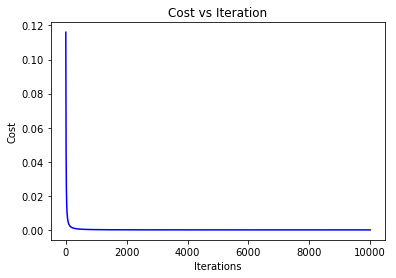

In [54]:
#Plot of Cost J-theta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Cost vs Iteration')
ax.plot(j_theta,color='blue')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
fig.show()

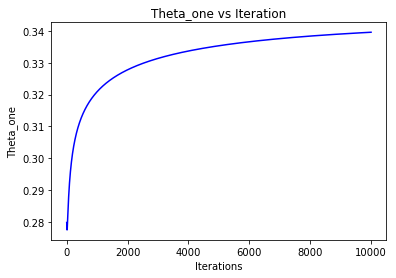

In [55]:
#theta_one_arry vs iterations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Theta_one vs Iteration')
ax.plot(theta_one_arry,color='blue')
ax.set_xlabel('Iterations')
ax.set_ylabel('Theta_one')
fig.show()

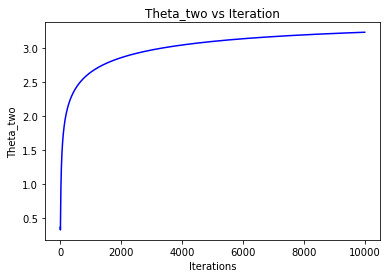

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Theta_two vs Iteration')
ax.plot(theta_two_arry,color='blue')
ax.set_xlabel('Iterations')
ax.set_ylabel('Theta_two')
fig.show()

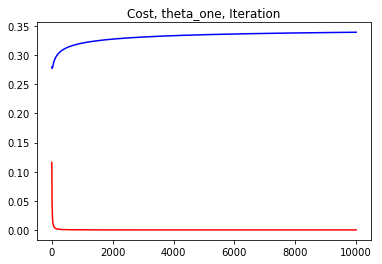

In [57]:
#theta_one vs cost
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Cost, theta_one, Iteration')
ax.plot(theta_one_arry,color='blue')
ax.plot(j_theta,color='red')
fig.show()

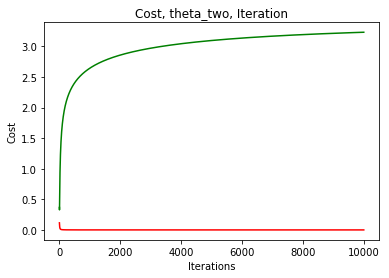

In [58]:
#theta_two vs cost
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Cost, theta_two, Iteration')
ax.plot(theta_two_arry,color='green')
ax.plot(j_theta,color='red')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
fig.show()